[필사 링크](https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda/notebook)

# load library

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# load data

In [7]:
netflix_overall = pd.read_csv("../data/netflix_titles.csv")
print(netflix_overall.shape)
netflix_overall.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# EDA

In [5]:
# count : null 값이 아닌 데이터들의 개수
# 처음 봄 
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [8]:
# 나라면 아마 이렇게 했겠지
netflix_overall.shape[0] - netflix_overall.isnull().sum()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [10]:
# type 이 TV Show 인 것들만 추출
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show']
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [18]:
# type 이 Movie 인 것들만 추출
netflix_movies = netflix_overall[netflix_overall['type']=='Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


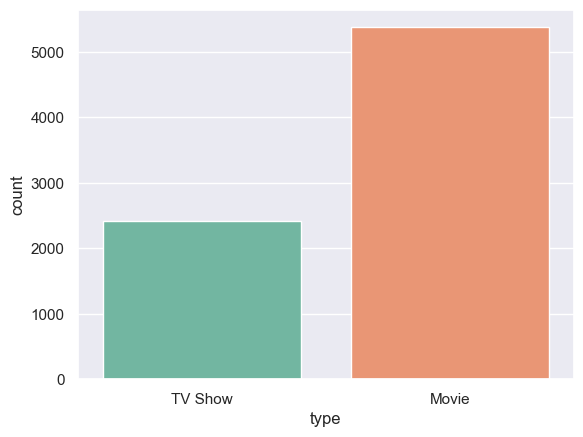

In [13]:
# type data 개수 시각화
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

In [16]:
netflix_overall["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [19]:
# 출시 날짜 중 결측치 제거
netflix_date = netflix_shows[['date_added']].dropna()

# sample data : March 20, 2019
# 연도 추출
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])

# 왼쪽 공백 제거 + 월 추출
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

# 월 순서
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# 시각화 위한 데이터 프레임
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df.head()

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0


findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.


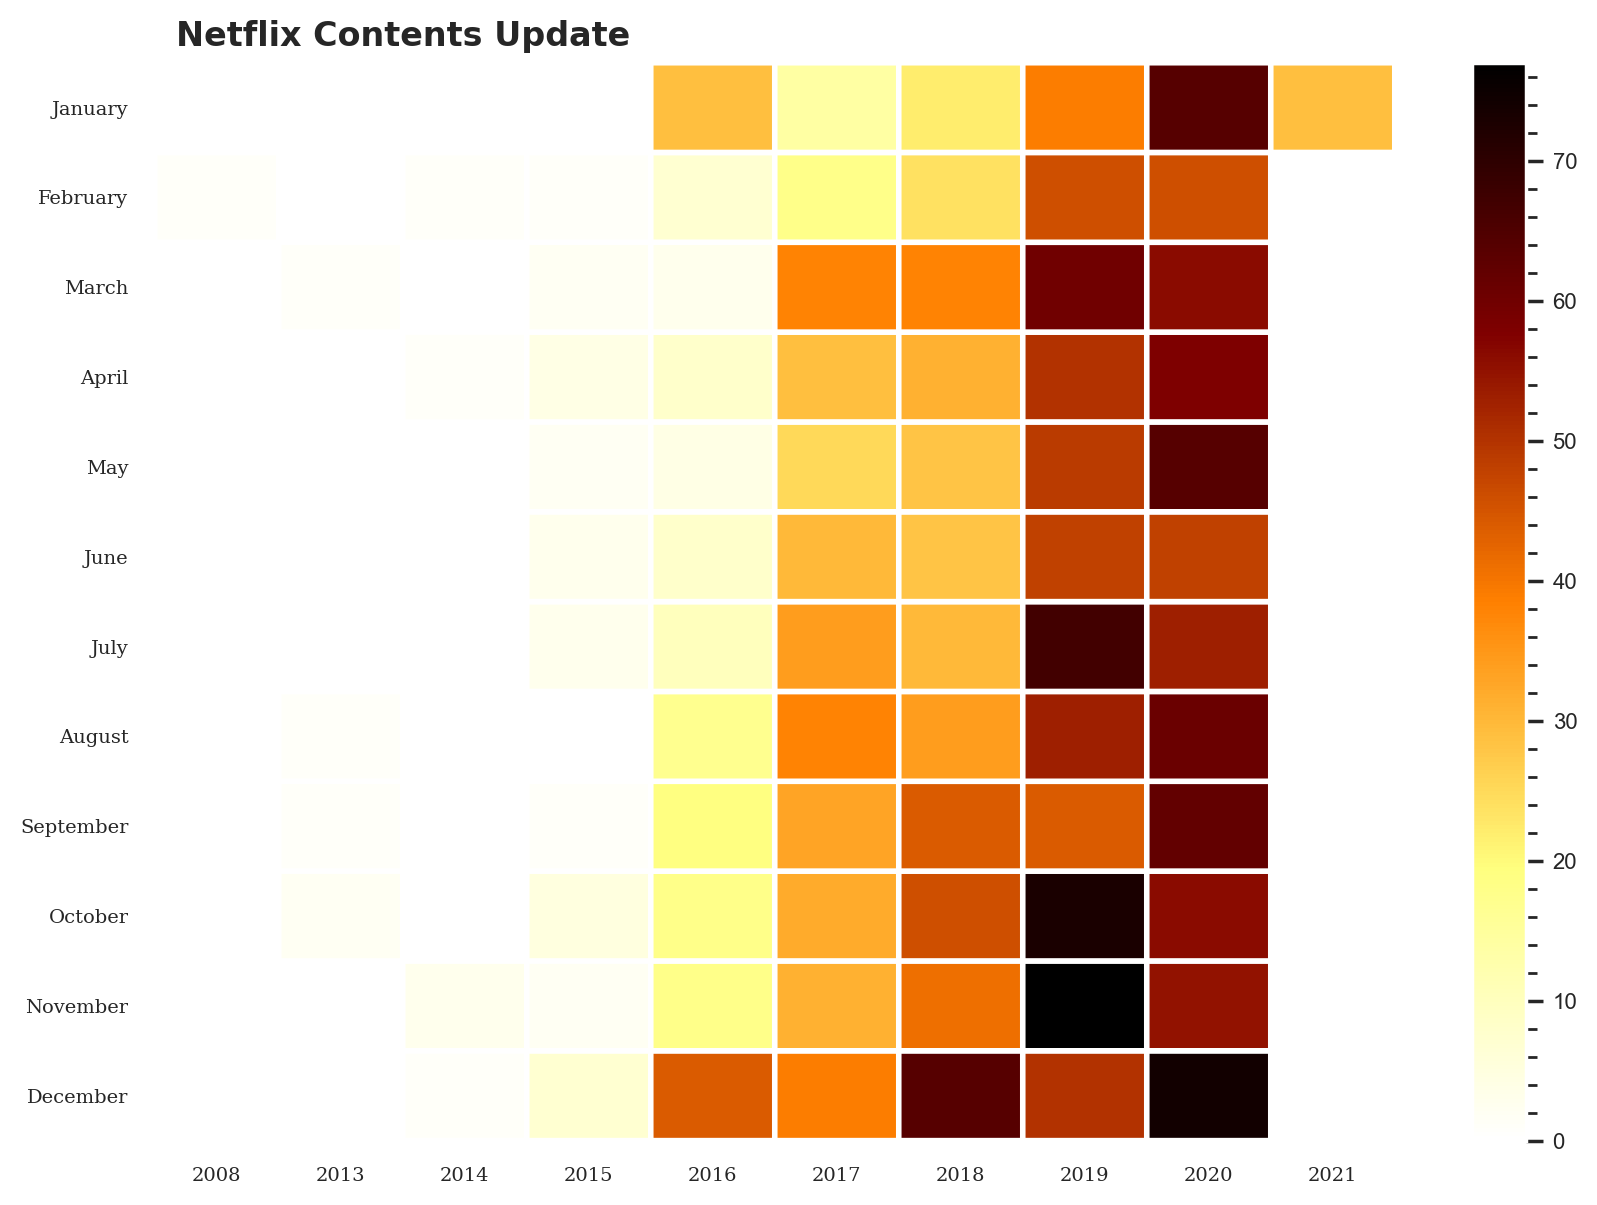

In [22]:
# 시각화
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

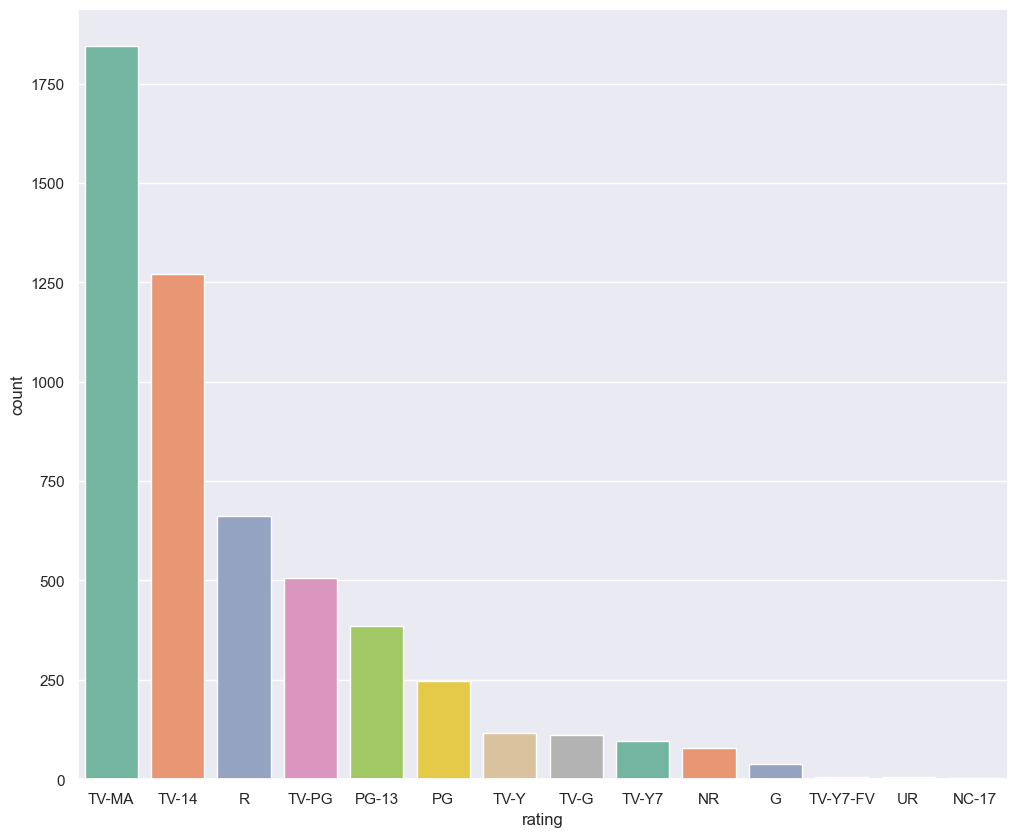

In [23]:
# rating column countplot
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

# Recommendation System

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# 결측치 대체
netflix_overall['description'] = netflix_overall['description'].fillna('')

# fit_transform
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

print(tfidf_matrix.shape)

# 7787개의 행이 17905개의 단어로 이루어져 있고
# 0이 아닌 값이 107187개 있다는 뜻
tfidf_matrix

(7787, 17905)


<7787x17905 sparse matrix of type '<class 'numpy.float64'>'
	with 107187 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.metrics.pairwise import linear_kernel

# 7787개 문장들의 코사인 유사도 계산
# Gram matrix : ndarray of shape (n_samples_X, n_samples_Y)
# The Gram matrix of the linear kernel, i.e. X @ Y.T.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
print(cosine_sim)

(7787, 7787)
[[1.         0.         0.05827946 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.09600035 0.         0.        ]
 [0.05827946 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.09600035 0.         ... 1.         0.         0.02819239]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02819239 0.         1.        ]]


In [33]:
# 이건 단어장인가?
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()
indices

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

In [34]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # 유사도 점수
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 점수를 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 비슷한 10개
    sim_scores = sim_scores[1:11]

    # 정렬된 스코어에서 영화 인덱스 가져오기
    movie_indices = [i[0] for i in sim_scores]

    # 인덱스를 가지고 유사도가 높은 영화 제목 출력
    return netflix_overall['title'].iloc[movie_indices]

In [35]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [36]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object